In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib as mpl
mpl.style.use('./style.mcstyle')   # noqa
from matplotlib import pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from tqdm import tqdm
import h5py
from collections import defaultdict

from astropy.cosmology import Planck18
cosmo = Planck18

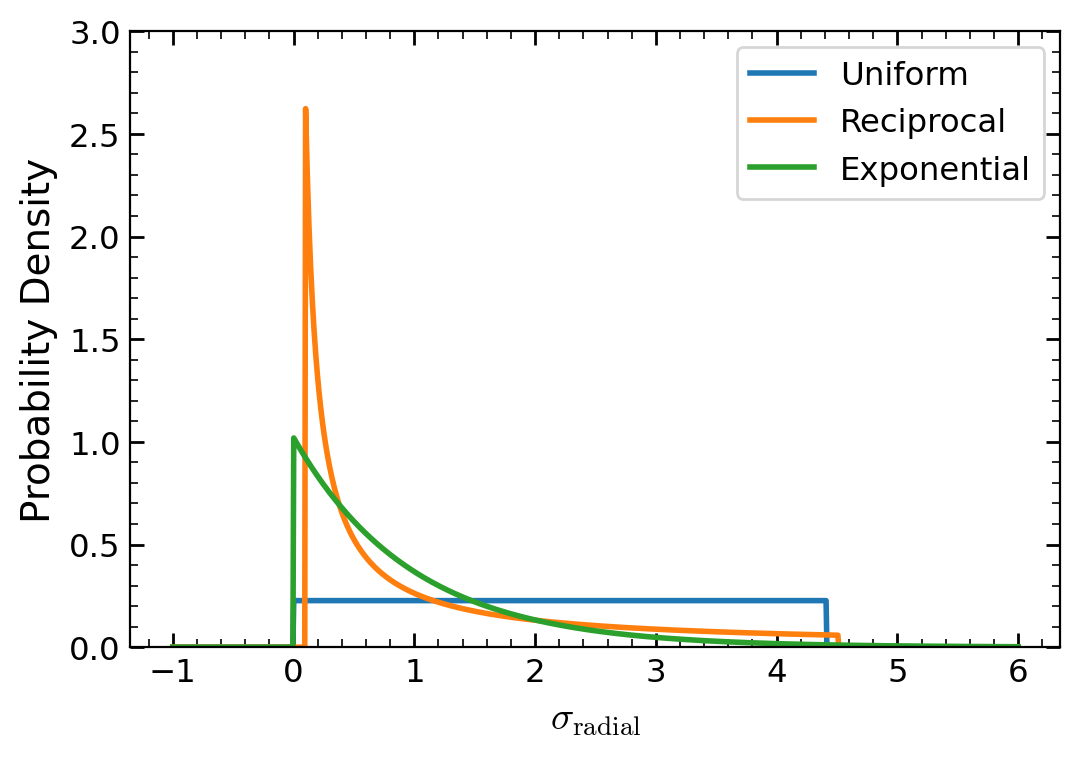

In [ ]:
from scipy.stats import uniform
from scipy.stats import expon

a, b = 1e-1, 1000/128/np.sqrt(3)

f, ax = plt.subplots(1, 1, figsize=(6, 4))
x_ = np.linspace(-1, 6, 1000)

pdf = uniform.pdf(x_, loc=0, scale=b-a)
ax.plot(x_, pdf, label='Uniform')

# log_samples = np.exp(np.random.uniform(np.log(a), np.log(b), size=10000))
# ax.hist(log_samples, bins=50, density=True, alpha=0.5, label='Log-uniform')

reciprocal_pdf = np.where((x_ > a) & (x_ < b), 1 /
                          (x_ * (np.log(b) - np.log(a))), 0)
ax.plot(x_, reciprocal_pdf, label='Reciprocal')

scale = b / expon.ppf(0.99, scale=1.)
expon_pdf = expon.pdf(x_, scale=scale)
ax.plot(x_, expon_pdf, label='Exponential')

ax.set_ylim(0, 3)
ax.set_xlabel(r'$\sigma_{\rm radial}$')
ax.set_ylabel('Probability Density')
ax.legend()
# ax.semilogy()

In [6]:
b, scale

(4.510548978043952, 0.97945326575942)

In [25]:
from cmass.infer.preprocess import _load_single_simulation_summaries

suitepath = '/ocean/projects/phy240015p/mho1/cmass-ili/quijotelike/fastpm_recnoise/L1000-N128'
simpaths = os.listdir(suitepath)

params = []
for d in tqdm(simpaths):
    simpath = join(suitepath, d)
    _, y = _load_single_simulation_summaries(
        simpath, 'simbig_lightcone', include_hod=False, include_noise=True)
    params.append(np.array(y))

100%|██████████| 2000/2000 [06:50<00:00,  4.87it/s]


In [26]:
params = np.concatenate(params)

[]

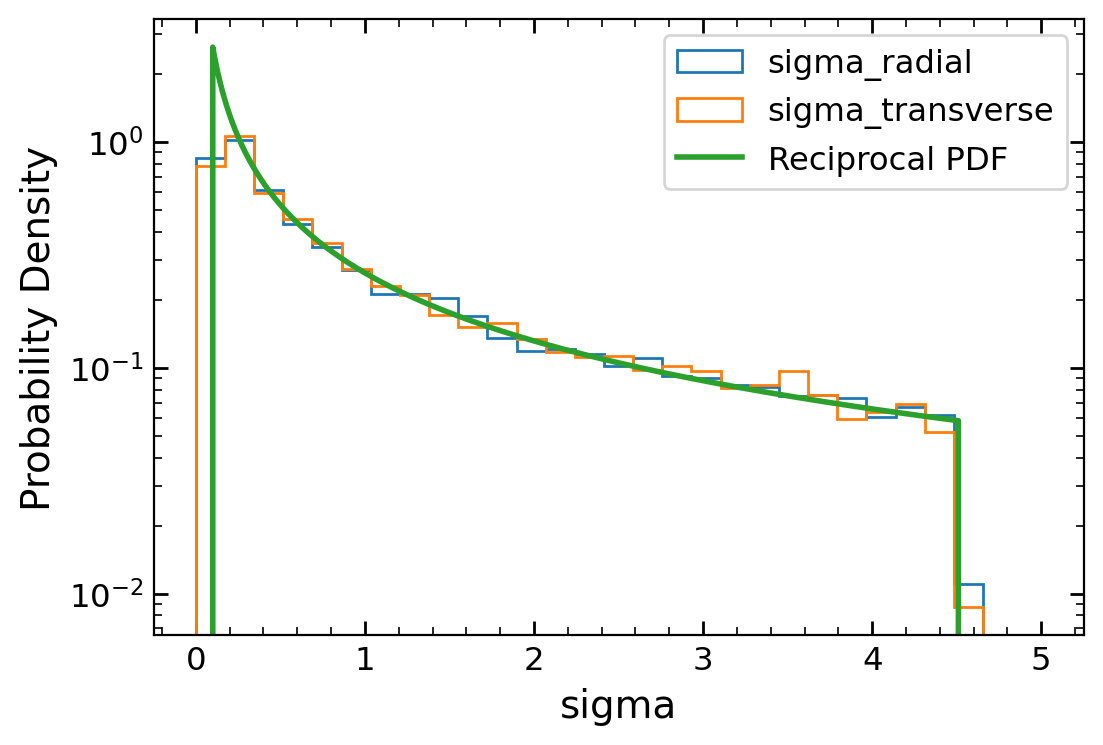

In [28]:
be = np.linspace(0, 5, 30)

f, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(params[:, -2], bins=be, density=True,
        histtype='step', label='sigma_radial')
ax.hist(params[:, -1], bins=be, density=True,
        histtype='step', label='sigma_transverse')

a, b = 1e-1, 1000/128/np.sqrt(3)
reciprocal_pdf = np.where((x_ > a) & (x_ < b), 1 /
                          (x_ * (np.log(b) - np.log(a))), 0)
ax.plot(x_, reciprocal_pdf, label='Reciprocal PDF')
ax.legend()
ax.set_xlabel('sigma')
ax.set_ylabel('Probability Density')
ax.semilogy()